# **DEEP LEARNING**

**Ejemplos del texto de Python Deep Learning de Jordi Torres**

## **EJEMPLO RECONOCIMIENTO DE DIGITOS**

Este ejemplo básico de iniciación analogo al *Hola mundo* de la programación emplea una base bien conocidad de imagenes estandarizadas para ilustrar y facilitar la adquisicion de los principales conceptos asociados a las redes neuronales.

Para ello se emplea la base de imagenes disponible en la libreria **KERAS**.

### MODELO DE CAPAS DENSAMENTE CONECTADAS

In [1]:
# Carga de librerias requeridas
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Para declarar el modelo
from keras.models import Sequential
from keras.layers import Input, Dense,Flatten

In [2]:
# Uso del ejemplo MNIST cargado como ejemplo en la libreria TensorFlow
mnist=tf.keras.datasets.mnist

(x_train,y_train), (x_test,y_test)=mnist.load_data()

VIsualizando una imagen cualquiera se tiene:

La etiqueta de la imagen es:  3


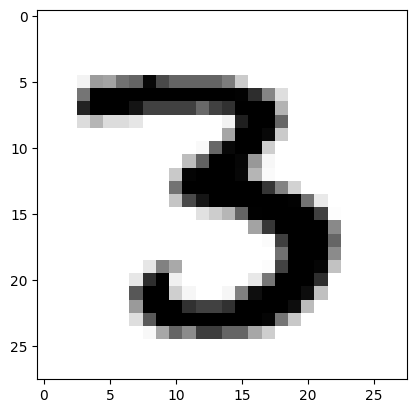

In [3]:
# Visualizacion de una imagen y su correspondiente etiqueta
i=12
plt.imshow(x_train[i],cmap=plt.cm.binary)
print('La etiqueta de la imagen es: ',y_train[i])

Las caracteristicas del arreglo de entrenamiento *x_train* se detalla a continuacion, donde la dimensión del arreglo es 3 (tensor), la forma muestra que se tienen 60000 imagenes de 28 por 28 pixeles y finalmente el tipo de dato corresponde a enteros de 8 bits.

In [4]:
# Dimension del arreglo
print(x_train.ndim)

# Forma o tamaño del arreglo
print(x_train.shape)

# Tipo de datos
print(x_train.dtype)

3
(60000, 28, 28)
uint8


#### **Preprocesado**

Generalmente las caracteristicas que serviran de entrada a una ***Red Neuronal*** se preprocesan a fin de evitar varios problemas y facilitar su procesamiento. Particularmente, la escala entre diferentes caracteristicas puede ser muy diferente lo cual puede afectar de manera importante la estimación de los pesos en la red.
Los principales o más habituales pasos de preprocesamiento son:

 - **Vectorización** : Permite manejar los datos de las caracteristicas de manera más simple para la red, pues se reduce la dimensión siendo mas facil recorrer todos los valores con un eje en lugar de 2 o mas.
 - **Normalización** : Facilita la convergencia en el procesode entrenamiento, generalmente se normaliza a valores entre 0 y 1.

Para el caso del ejemplo los valores varian entre 0 y 255, de tal manera que se normalizan a valores entre cero  y uno así:


In [5]:
# Antes de la normalizacion

print('Valores iniciales de la imagen \n\n',x_train[5,9:-7,9:-7])

# Aplicando la normalizacion
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train_N=x_train/255
x_test_N=x_test/255

# Despues de la normalización
print('\nValores finales de la imagen \n\n',x_train_N[5,9:-7,9:-7])


Valores iniciales de la imagen 

 [[ 96 252 252 252 252 217  29   0  37 252 252  60]
 [181 252 252 220 167  30   0   0  77 252 252  60]
 [ 26 128  58  22   0   0   0   0 100 252 252  60]
 [  0   0   0   0   0   0   0   0 157 252 252  60]
 [  0   0   0   0 110 121 122 121 202 252 194   3]
 [  0  10  53 179 253 253 255 253 253 228  35   0]
 [ 54 227 252 243 228 170 242 252 252 231 117   6]
 [252 252 125  59   0  18 208 252 252 252 252  87]
 [252 180  16   0  21 203 253 247 129 173 252 252]
 [106  17   0  53 200 252 216  65   0  14  72 163]
 [ 18  73 170 244 252 126  29   0   0   0   0   0]
 [216 252 252 252 124   3   0   0   0   0   0   0]]

Valores finales de la imagen 

 [[0.3764706  0.9882353  0.9882353  0.9882353  0.9882353  0.8509804
  0.11372549 0.         0.14509805 0.9882353  0.9882353  0.23529412]
 [0.70980394 0.9882353  0.9882353  0.8627451  0.654902   0.11764706
  0.         0.         0.3019608  0.9882353  0.9882353  0.23529412]
 [0.10196079 0.5019608  0.22745098 0.08627451 0

Finalmente la vectorización se obtiene usando ***reshape*** sobre los elementos de las imagenes tanto para el conjunto de entrenamiento como para el de prueba.

In [6]:
# Aplicando la vectorización
x_train_V=x_train_N.reshape(60000,784)
x_test_V=x_test_N.reshape(10000,784)

# Verificando el tamaño final de los arreglos
print('Nuevo tamaño del arreglo de entrenamiento: ',x_train_V.shape)
print('Nuevo tamaño del arreglo de prueba: ',x_test_V.shape)

Nuevo tamaño del arreglo de entrenamiento:  (60000, 784)
Nuevo tamaño del arreglo de prueba:  (10000, 784)


**Etiquetas**

Dado que en este caso se tienen 10 categorias para la clasificación de las imagenes, entonces se suele emplear (porque? aun no lo se) varaibles *dummy* para identificar la posición de la categoria en el vector con un 1 y ceros para los demas valores. Esto se denomina ***Codificación one-hot*** y se aplica a partir del modulo *utils* de *keras* así:


In [7]:
# Uso del modulo to_categorical de keras
from tensorflow.keras.utils import to_categorical

In [8]:
# Valores de etiquetas antes de transformacion

print('Valor de la etiqueta 5 en el set de entrenamiento:', y_train[5])

y_train_OS=to_categorical(y_train,num_classes=10)
y_test_OS=to_categorical(y_test,num_classes=10)

print('Valor de la etiqueta 5 en el set de entrenamiento luego de la transformación:', y_train_OS[5])

print('Tamaño del arreglo de etiquetas:', y_train_OS.shape)

Valor de la etiqueta 5 en el set de entrenamiento: 2
Valor de la etiqueta 5 en el set de entrenamiento luego de la transformación: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Tamaño del arreglo de etiquetas: (60000, 10)


#### **Definición del Modelo**




In [9]:
# Declaración del primer modelo


Modelo_01=Sequential()
Modelo_01.add(Input(shape=(784,)))
Modelo_01.add(Dense(10,activation='relu'))
Modelo_01.add(Dense(10,activation='softmax'))

#### **Configurando el proceso de aprendizaje**

In [10]:
# sgd: Stochastic gradient descent

Modelo_01.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

#### **Entrenamiento del modelo**

In [11]:
Modelo_01.fit(x_train_V,y_train_OS,epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.5994 - loss: 1.2849
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8713 - loss: 0.4598
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8931 - loss: 0.3754
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9029 - loss: 0.3388
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9090 - loss: 0.3191
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9140 - loss: 0.3087
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9150 - loss: 0.2975
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9193 - loss: 0.2857
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9195 - loss: 0.2841
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9214 - loss: 0.2753
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9239 - loss: 0.2721
Epoch 12/20
1875/1875 ━━━━━━━

#### **Evaluación del modelo**

In [12]:
test_loss, test_acc =Modelo_01.evaluate(x_test_V,y_test_OS)
print('Presición del Modelo', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9191 - loss: 0.2861
Presición del Modelo 0.9297000169754028


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


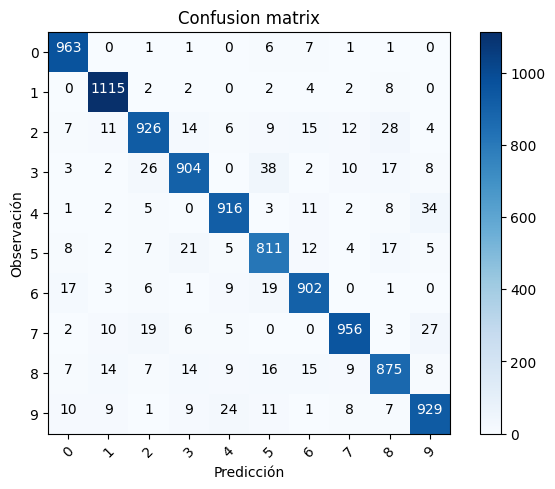

In [13]:
# Codigo tomado del repositorio del autor
#  https://github.com/jorditorresBCN/python-deep-learning/blob/master/05_redes_neuronales_en_keras.ipynb
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')
     

from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = Modelo_01.predict(x_test_V)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test_OS, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))
     


#### **Predicción con el modelo entrenado**

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
6


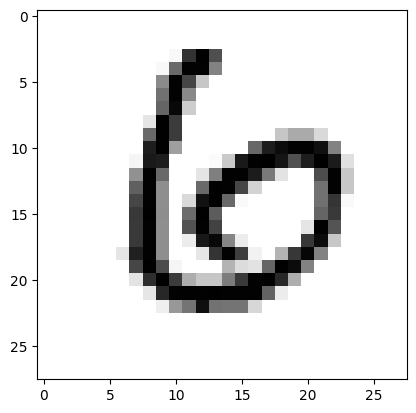

In [14]:
# Se ejecuta la prediccion para todos los valores de prueba
Prediccion=Modelo_01.predict(x_test_V)

# Para un ejemplo particular el resultado es:

plt.imshow(x_test[11],cmap=plt.cm.binary)

print(np.argmax(Prediccion[11]))

### **MODELO DE REDES NEURONALES CONVOLUCIONALES**

In [15]:
# Carga de librerias requeridas

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

#### **Preprocesado**

In [16]:
# Antes de la normalizacion

# Redimencionamiento de los arreglos
#print(x_train.shape)
x_train2=x_train.reshape(60000,28,28,1)
x_test2=x_test.reshape(10000,28,28,1)
#print(x_train2.shape)
# Aplicando la normalizacion
x_train2=x_train2.astype('float32')/255
x_test2=x_test2.astype('float32')/255

# Conversion de etiquetas en objetos categoricos
y_train2=to_categorical(y_train,num_classes=10)
y_test2=to_categorical(y_test,num_classes=10)

#### **Definición del modelo**

In [17]:
# Declaración del primer modelo


Modelo_02=Sequential()
Modelo_02.add(Conv2D(32,(5,5),activation='relu',
              input_shape=(28,28,1)))
Modelo_02.add(MaxPooling2D((2,2)))
Modelo_02.add(Conv2D(64,(5,5),activation='relu'))
Modelo_02.add(MaxPooling2D((2,2)))
Modelo_02.add(Flatten())
Modelo_02.add(Dense(10,activation='softmax'))
Modelo_02.summary()


c:\Users\Fernando\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 64)       │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,346 (243.54 KB)

 Trainable params: 62,346 (243.54 KB)

 Non-trainable params: 0 (0.00 B)

#### **Configuración del proceso de aprendizaje**

In [18]:
Modelo_02.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

#### **Entrenamiento del modelo**

In [19]:
Modelo_02.fit(x_train2,y_train2,batch_size=100,epochs=5)

Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.5834 - loss: 1.5573
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - accuracy: 0.9166 - loss: 0.2836
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - accuracy: 0.9443 - loss: 0.1924
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - accuracy: 0.9552 - loss: 0.1558
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.9632 - loss: 0.1273


#### **Evaluación del Modelo**

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9644 - loss: 0.1226
Precision en el conjunto de prueba:  0.9699000120162964
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


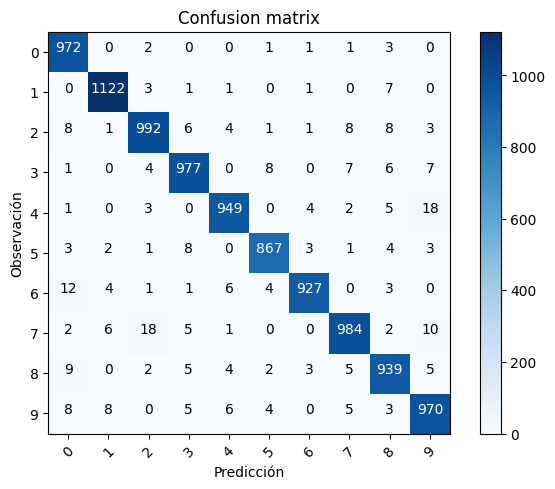

In [22]:
test_loss, test_acc=Modelo_02.evaluate(x_test2,y_test2)
print('Precision en el conjunto de prueba: ', test_acc)

# Predict the values from the validation dataset
Y_pred = Modelo_02.predict(x_test2)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test2, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))